# Машинное обучение, ФКН ВШЭ

# Практическое задание 7. Бустинговое

## Общая информация

Дата выдачи: 06.12.2021

Мягкий дедлайн: 18.12.2021 23:59 MSK

Жёсткий дедлайн: 19.12.2021 23:59 MSK

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

## Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-07-Username.ipynb

Username — ваша фамилия на латинице

## О задании

В этом задании вам предстоит вручную запрограммировать один из самых мощных алгоритмов машинного обучения — бустинг.

In [117]:
from warnings import filterwarnings

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.sparse import load_npz
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

sns.set(style='darkgrid')
filterwarnings('ignore')

In [235]:
x = load_npz('x.npz')
y = np.load('y.npy')

Разделим на обучающую, валидационную и тестовую выборки (`random_state` оставьте равным 1337 для воспроизводимости).

In [236]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1337)

x_test, x_valid, y_test, y_valid = train_test_split(x_test, y_test, test_size=0.5, random_state=1337)

x_train.shape, x_valid.shape, x_test.shape

((18825, 169), (2354, 169), (2353, 169))

## Задание 1. Реализация градиентного бустинга (4 балла)

Вам нужно дописать код в файлике `boosting.py`. Для вас уже подготовлен шаблон класса `Boosting`, вы можете менять его по своему усмотрению.

### Инструкции для функций:

#### `__init__`

В `__init__` приходит кучка параметров, распишем что есть что:

 - `base_model_class` - класс базовой модели нашего бустинга
 - `base_model_params` - словарь с гиперпараметрами для базовой модели
 - `n_estimators` - какое количество базовых моделей нужно обучить
 - `learning_rate` - темп обучения, должен быть из полуинтервала $(0, 1]$
 - `subsample` - доля объектов, на которой будет обучаться базовая модель (какую часть составляет бутстрапная выборка от исходной обучающей)
 - `early_stopping_rounds` - число итераций, после которых при отсутствии улучшения качества на валидационной выборке обучение останавливается
 - `plot` - строить ли после обучения всех базовых моделей график с качеством

#### `fit`

В `fit` приходит две выборки, обучающая и валидационная. На обучающей мы обучаем новые базовые модели, на валидационной считаем качество для ранней остановки (если это предусматривают параметры).

Сначала нам нужно сделать какую-то нулевую модель, сделать предсказания для обучающей и валидационной выборок (в шаблоне это нулевая модель, соответственно предсказания это просто `np.zeros`). После этого нужно обучить `n_estimators` базовых моделей (как и на что обучаются базовые модели смотрите в лекциях и семинарах). После каждой обученной базовой модели мы должны обновить текущие предсказания, посчитать ошибку на обучающей и валидационной выборках (используем `loss_fn` для этого), проверить на раннюю остановку.

После всего цикла обучения надо нарисовать график (если `plot`).


#### `fit_new_base_model`

В `fit_new_base_model` приходит обучающая выборка (целиком) и текущие предсказания для неё. Мы должны сгенерировать бутстрап выборку для обучения базовой модели и обучить базовую модель. После обучения модели запускаем поиск оптимальной гаммы, добавляем новую модель и гамму (не забываем про темп обучения) в соответствующие списки.

#### `predict_proba`

В `predict_proba` приходит выборка, нужно предсказать вероятности для неё. Суммируем предсказания базовых моделей на этой выборке (не забываем про гаммы) и накидываем сигмоиду.

In [18]:
%load_ext autoreload

In [19]:
%autoreload 2

from boosting import Boosting

### Проверка кода

У автора задания всё учится около одной секунды.

In [252]:
boosting = Boosting()

%time boosting.fit(x_train, y_train, x_valid, y_valid)

assert len(boosting.models) == boosting.n_estimators
assert len(boosting.gammas) == boosting.n_estimators

assert boosting.predict_proba(x_test).shape == (x_test.shape[0], 2)

print(f'Train ROC-AUC {boosting.score(x_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(x_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(x_test, y_test):.4f}')

Wall time: 1.26 s
Train ROC-AUC 0.9894
Valid ROC-AUC 0.9093
Test ROC-AUC 0.9140


## Задание 2. Обучение градиентного бустинга (1 балл)

Оцените качество на тестовой выборке вашей имплементации бустинга для различной максимальной глубины решающего дерева в качестве базовой модели. Здесь и далее мы будем использовать метрику ROC-AUC.

Перебирайте максимальную глубину от 1 до 30 с шагом 2 (остальные параметры бустинга стоит оставить равными по умолчанию). Постройте график зависимости качества на обучающей и тестовой выборке в зависимости от глубины.

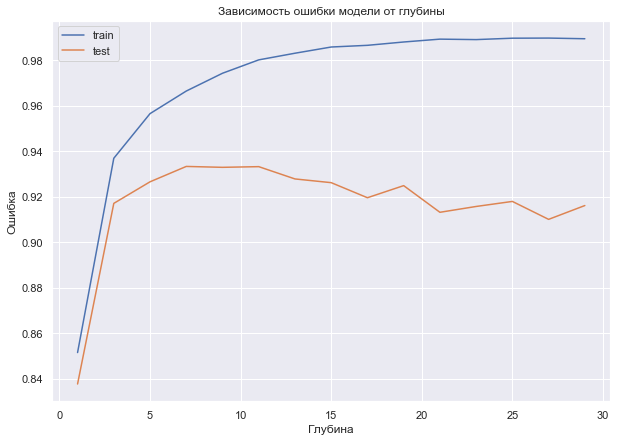

In [40]:
results = {}

depths = range(1, 30, 2)
train_scores = []
test_scores = []

for depth in depths:
    boosting = Boosting(base_model_params={'max_depth':depth})
    boosting.fit(x_train, y_train, x_valid, y_valid)
    train_scores.append(boosting.score(x_train, y_train))
    test_scores.append(boosting.score(x_test, y_test))

fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(depths, train_scores, label='train')
ax.plot(depths, test_scores, label='test')
ax.legend()
ax.set_title('Зависимость ошибки модели от глубины')
ax.set_xlabel('Глубина')
ax.set_ylabel('Ошибка')
plt.show()

**Какая из моделей имеет лучшее качество? Как вы можете это объяснить?**

Видим, что лучшее качество достагают модели с глубиной около 7. Это логично, потому что модели с сильно меньше глубиной получаются слишком простые и недообучаются, а с сильно большей - наоборот, слишком сложные, и из за этого начинают переобучаться, что и видно из графика трейна.

## Задание 3. Подбираем гиперпараметры и ищем лучшую модель (2 балла)

Подберите по валидационной выборке основные гиперпараметры для вашей модели бустинга. Следует подобрать все основные параметры для самого градиентного бустинга и для самих базовых моделей.

In [ ]:
from IPython.display import clear_output

In [49]:
%%time
best_score = 0
best_params = []

i = 1
for n_estimators in [5, 10, 25, 40]:
    for lr in [0.01, 0.1, 0.4, 0.7]:
        for subsample in [0.1, 0.3, 0.5, 0.8]:
            for max_depth in [5, 7, 9, 11, 13]:
                for min_samples_leaf in [1, 3, 5, 10]:
                    params = {'max_depth': max_depth, 'min_samples_leaf': min_samples_leaf}
                    boosting = Boosting(base_model_params=params,
                                        n_estimators=n_estimators,
                                        learning_rate=lr,
                                        subsample=subsample,
                                        early_stopping_rounds=4)
                    boosting.fit(x_train, y_train, x_valid, y_valid)
                    
                    score = boosting.score(x_valid, y_valid)
                    if score > best_score:
                        best_score = score
                        best_params = [n_estimators, lr, subsample, max_depth, min_samples_leaf]
                    clear_output(wait=True)
                    print(f'{i / (4 * 4 * 4 * 5 * 4) * 100:.2f}%')
                    i+= 1

99.92%
Wall time: 28min 19s


In [61]:
params = {'max_depth': 10, 
          'min_samples_leaf': 10,
          'n_estimators': ,
          'learning_rate': ,
          'subsample': ,
          'early_stopping_rounds': 4}
model = xgb.XGBClassifier(params)

In [ ]:
XGBRFRegressor

In [50]:
best_score

0.9421115982736725

In [51]:
best_params

[40, 0.7, 0.3, 7, 10]

In [52]:
params = {'max_depth': best_params[3], 'min_samples_leaf': best_params[4]}
boosting = Boosting(base_model_params=params, n_estimators=best_params[0], learning_rate=best_params[1], subsample=best_params[2])
boosting.fit(x_train, y_train, x_valid, y_valid)
score = boosting.score(x_test, y_test)
print(f'Test score: {score:.4f}')

Test score: 0.9380


## Задание 4. Пробуем разные библиотеки (2 балла)

Выберите себе библиотеку с реализацией градиентного бустинга по вкусу из следующих трёх - [XGBoost](https://xgboost.readthedocs.io/en/stable/python/python_intro.html), [LightGBM](https://lightgbm.readthedocs.io/en/latest/Python-Intro.html), [CatBoost](https://catboost.ai/en/docs/concepts/python-quickstart). Подберите основные гиперпараметры, постарайтесь добиться наилучшего качества на тестовых данных. Сравните результаты своей реализации с результатами библиотечного бустинга.

In [55]:
#!pip install xgboost
import xgboost as xgb
from sklearn.metrics import roc_auc_score

In [86]:
def score_f(clf, x, y):
    return roc_auc_score(y == 1, clf.predict_proba(x)[:, 1])

In [95]:
%%time
best_score = 0
best_params = {}

i = 1
for n_estimators in [5, 10, 25, 40]:
    for lr in [0.01, 0.1, 0.4, 0.7]:
        for subsample in [0.1, 0.3, 0.5, 0.8]:
            for max_depth in [5, 7, 9, 11, 13]:
                    params = {'max_depth': max_depth, 
                              'n_estimators': n_estimators,
                              'learning_rate': lr,
                              'subsample': subsample}
                    boosting = xgb.XGBClassifier(**params)
                    boosting.fit(x_train, y_train)
                    score = score_f(boosting, x_valid, y_valid)
                    
                    if score > best_score:
                        best_score = score
                        best_params = params
                    clear_output(wait=True)
                    print(f'{i / (4 * 4 * 5 * 4) * 100:.2f}%')
                    i+= 1

100.00%
Wall time: 48.2 s


In [99]:
best_score

0.9455011162700854

In [101]:
best_params

{'max_depth': 5, 'n_estimators': 25, 'learning_rate': 0.4, 'subsample': 0.5}

In [100]:
boosting = xgb.XGBClassifier(**best_params)
boosting.fit(x_train, y_train)
score = score_f(boosting, x_test, y_test)
print(f'Test score: {score:.4f}')

[20:17:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Test score: 0.9396


БОЖЕ, ОН РАБОТАЕТ В 40 РАЗ БЫСТРЕЕ ААААААААААААААААА

### Задание 5 (бонус). Пробуем ещё немножко библиотек (1 балл)

Существуют библиотеки для подбора гиперпараметров, попробуйте использовать какую-нибудь из следующих двух - [Hyperopt](https://github.com/hyperopt/hyperopt), [Optuna](https://optuna.org/). Сравните полученное качество с вашим ручным перебором. Используйте эту библиотеку чтобы подобрать параметры и для своей реалзиации и для библиотечной.

In [154]:
#!pip install optuna
import optuna

In [166]:
optuna.logging.set_verbosity(optuna.logging.WARNING)

In [169]:
%%time
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 5, 200, log=False)
    learning_rate = trial.suggest_float('learning_rate', 0, 1)
    subsample = trial.suggest_float('subsample', 0, 1)
    max_depth = trial.suggest_int('max_depth', 1, 50, log=False)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 150, log=True)


    params = {'max_depth': max_depth, 'min_samples_leaf': min_samples_leaf}
    boosting = Boosting(n_estimators=n_estimators,
                            learning_rate=learning_rate,
                            subsample=subsample,
                            base_model_params=params)
    boosting.fit(x_train, y_train, x_valid, y_valid)
    score = boosting.score(x_valid, y_valid)

    return score


study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)
best_trial = study.best_trial

Wall time: 16min 37s


In [171]:
best_trial.params

{'n_estimators': 141,
 'learning_rate': 0.9964227974101253,
 'subsample': 0.48737692377708214,
 'max_depth': 5,
 'min_samples_leaf': 28}

In [174]:
params = {'max_depth': best_trial.params['max_depth'], 'min_samples_leaf': best_trial.params['min_samples_leaf']}
boosting = Boosting(n_estimators=best_trial.params['n_estimators'],
                            learning_rate=best_trial.params['learning_rate'],
                            subsample=best_trial.params['subsample'],
                            base_model_params=params)
boosting.fit(x_train, y_train, x_valid, y_valid)
score = boosting.score(x_test, y_test)
print(f'Test score: {score:.4f}')

Test score: 0.9393


Нуу, получилось немного лучше, чему у моего перебора, но учитывая, что я поставил на перебор дофигамиллион параметров, а работала она раза в 2 быстрее, думаю, что это хороший результат, с точки зрения скорости так точно.

In [170]:
%%time
def objective2(trial):
    n_estimators = trial.suggest_int('n_estimators', 5, 200, log=False)
    learning_rate = trial.suggest_float('learning_rate', 0, 1)
    subsample = trial.suggest_float('subsample', 0, 1)
    max_depth = trial.suggest_int('max_depth', 1, 50, log=False)


    params = {'max_depth': max_depth, 
                              'n_estimators': n_estimators,
                              'learning_rate': learning_rate,
                              'subsample': subsample}
    boosting = xgb.XGBClassifier(**params)
    boosting.fit(x_train, y_train)
    score = score_f(boosting, x_valid, y_valid)

    return score


study2 = optuna.create_study(direction='maximize')
study2.optimize(objective2, n_trials=100)
best_trial2 = study2.best_trial

[21:54:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:54:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:54:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:54:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[21:55:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:55:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:55:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:55:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[21:55:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:55:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:55:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:55:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[21:55:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:55:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:55:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:55:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [172]:
best_trial2.params

{'n_estimators': 116,
 'learning_rate': 0.5255609473757628,
 'subsample': 0.9639092314920716,
 'max_depth': 3}

In [175]:
boosting = xgb.XGBClassifier(**best_trial2.params)
boosting.fit(x_train, y_train)
score = score_f(boosting, x_test, y_test)
print(f'Test score: {score:.4f}')

[22:50:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Test score: 0.9393


А тут резельтат что то подвёл, получилось даже хуже, чем у меня :(, хотя работало, опять же, быстрее (да не сильно меньше получилось).

Хочется сделать вывод, что если нам не страшно потерять чутка в точности, но суперски увеличить скорость, тогда эта библиотека - то, что надо.

## Задание 6. Интерпретация бустингового (1 балл)

Постройте калибровочную кривую для вашей лучшей модели бустинга (из тех, что используют вашу реализацию).
Насколько хорошо бустинг оценивает вероятности? Постройте также калибровочную кривую для логистической регресии, сравните их между собой. Проанализируйте полученные результаты.

In [196]:
def plot_calibration_curve(y_test, preds):
    bin_middle_points = []
    bin_real_ratios = []
    n_bins = 10
    for i in range(n_bins):
        l = 1.0 / n_bins * i
        r = 1.0 / n_bins * (i + 1)
        bin_middle_points.append(l + (r - l) / 2) # 1
        bin_real_ratios.append(np.mean(y_test[(preds >= l) & (preds < r)])) # 2
    plt.figure(figsize=(6,6))
    plt.plot(bin_middle_points, bin_real_ratios, label='Оцениваемая модель')
    plt.ylim([-0.05, 1.05])
    plt.grid()
    plt.plot([0, 1], [0, 1], label='Лучшая модель')
    plt.title('Калибровочнкая кривая')
    plt.legend()

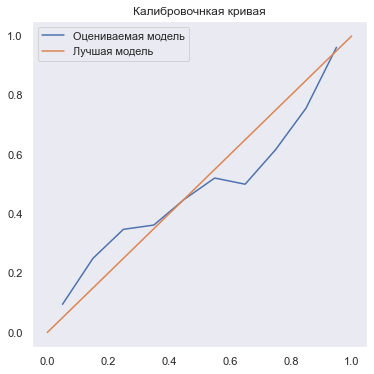

In [197]:
best_params = list(best_trial.params.values())
params = {'max_depth': best_params[3], 'min_samples_leaf': best_params[4]}
boosting = Boosting(base_model_params=params, n_estimators=best_params[0], learning_rate=best_params[1], subsample=best_params[2])
boosting.fit(x_train, y_train, x_valid, y_valid)
y_test0 = y_test.copy()
y_test0[y_test0 == -1] = 0
plot_calibration_curve(y_test0, boosting.predict_proba(x_test)[:, 1])

In [113]:
from sklearn.linear_model import LogisticRegression

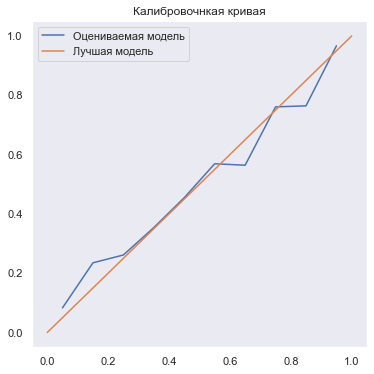

In [198]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_test0 = y_test.copy()
y_test0[y_test0 == -1] = 0
plot_calibration_curve(y_test0, model.predict_proba(x_test)[:, 1])

Для бустинга калибровочная кривая получилась практически как x, т.е. бустинг довольно хорошо оценивает вероятности. Если сравнивать его с лог регрессией, то он кажется лишь немного хуже, но нужно учитывать, что для регрессии мы не подбирали никаких гиперпараметров. Кажется логичным, что бустинг неплох в оценке вероятностей, потому что мы строим сложную композицию алгоритмов, при это не ставя им никаких регуляризаций (как в SVD), за счёт этого он под капотом также обучается на оценку вероятностей, но всё равно делает это немного хуже, чем лог регрессия (ведь она нацелена именно на это).

Теперь попробуем оценить важность признаков для бустинга.

Поскольку наша базовая модель - это дерево из `sklearn`, мы можем вычислить важность признака отдельно для каждого дерева и усреднить (воспользуйтесь `feature_importances_` у `DecisionTreeRegressor`), после этого нормировать значения, чтобы они суммировались в единицу (обратите внимание, что они должны быть неотрицательными - иначе вы что-то сделали не так).

Допишите в вашей реализации бустинга функцию `feature_importances_` чтобы она возвращала описанные выше важности признаков.

Нарисуйте столбчатую диаграмму важности признаков. На соседнем графике нарисуйте важность признаков для логистической регрессии, для этого используйте модули весов. Сравните графики. Проанализируйте полученные результаты.

(169,)


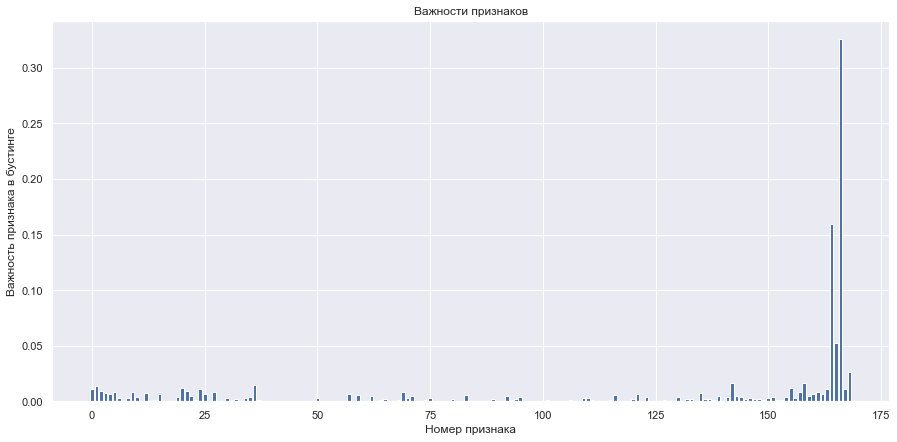

In [199]:
best_params = list(best_trial.params.values())
params = {'max_depth': best_params[3], 'min_samples_leaf': best_params[4]}
boosting = Boosting(base_model_params=params, n_estimators=best_params[0], learning_rate=best_params[1], subsample=best_params[2])
boosting.fit(x_train, y_train, x_valid, y_valid)
feat_imp = boosting.feature_importances_

fig, ax = plt.subplots(figsize=(15, 7))
ax.bar(range(len(feat_imp)), feat_imp)
ax.set_xlabel('Номер признака')
ax.set_ylabel('Важность признака в бустинге')
ax.set_title('Важности признаков')
plt.show()

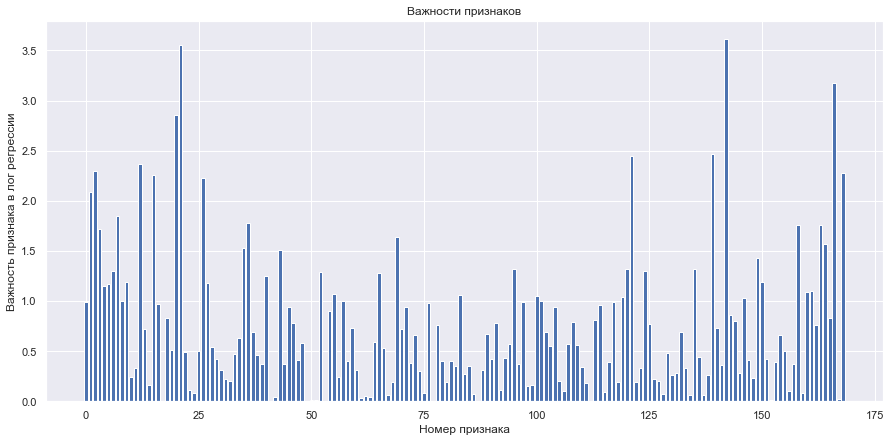

In [134]:
model = LogisticRegression()
model.fit(x_train, y_train)

fig, ax = plt.subplots(figsize=(15, 7))
ax.bar(range(len(model.coef_[0])), np.abs(model.coef_[0]))
ax.set_xlabel('Номер признака')
ax.set_ylabel('Важность признака в лог регрессии')
ax.set_title('Важности признаков')
plt.show()


Видим, что по настоящиму значимы для бустинга лишь некоторые признаки, некоторые даже имеют значимость 0. В лог регресси же распределение куда более равномерно, но даже тут имеются практически нулевые признаки. Это можно объяснить тем, что деревья в бустинге отбирают признаки, и из за этого стараются найти наиболее полезные, а лог регрессия просто настраивает коэффициенты без каких либо регуляризацй, поэтому у получаются такие графики.

Кстати, чаще всего излишние признаки могут вредить качеству бустинга. Попробуйте отфильтровать на основании диаграммы хвост наименее важных признаков и снова обучить модель (с теми же гиперпараметрами). Стало ли лучше?

In [200]:
mask = feat_imp > 0
best_params = list(best_trial.params.values())
params = {'max_depth': best_params[3], 'min_samples_leaf': best_params[4]}
boosting = Boosting(base_model_params=params, n_estimators=best_params[0], learning_rate=best_params[1], subsample=best_params[2])
boosting.fit(x_train[:,mask], y_train, x_valid[:,mask], y_valid)
score = score_f(boosting, x_test[:,mask], y_test)
print(f'Test score: {score:.4f}')

Test score: 0.9399


In [201]:
mask = feat_imp > 1e-3
best_params = list(best_trial.params.values())
params = {'max_depth': best_params[3], 'min_samples_leaf': best_params[4]}
boosting = Boosting(base_model_params=params, n_estimators=best_params[0], learning_rate=best_params[1], subsample=best_params[2])
boosting.fit(x_train[:,mask], y_train, x_valid[:,mask], y_valid)
score = score_f(boosting, x_test[:,mask], y_test)
print(f'Test score: {score:.4f}')

Test score: 0.9404


In [202]:
mask = feat_imp > 5e-3
best_params = list(best_trial.params.values())
params = {'max_depth': best_params[3], 'min_samples_leaf': best_params[4]}
boosting = Boosting(base_model_params=params, n_estimators=best_params[0], learning_rate=best_params[1], subsample=best_params[2])
boosting.fit(x_train[:,mask], y_train, x_valid[:,mask], y_valid)
score = score_f(boosting, x_test[:,mask], y_test)
print(f'Test score: {score:.4f}')

Test score: 0.9385


Да, если убирать не слишком много, то становится немного лучше.

## Задание 7 (бонус). Блендинговое (1 балл)

Реализуйте блендинг над вашими лучшими моделями (ваша реализация с лучшими гиперпараметрами + все модели из библиотек с лучшими гиперпараметрами). Улучшилось ли качество?

In [205]:
from sklearn.model_selection import train_test_split

In [239]:
X_train1, X_train2, y_train1, y_train2 = train_test_split(x_train, y_train, test_size=0.5, random_state=42)

In [240]:
mask = feat_imp > 1e-3
best_params = list(best_trial.params.values())
params = {'max_depth': best_params[3], 'min_samples_leaf': best_params[4]}
boosting = Boosting(base_model_params=params, n_estimators=best_params[0], learning_rate=best_params[1], subsample=best_params[2])
boosting.fit(X_train1[:,mask], y_train1, x_valid[:,mask], y_valid)
preds1 = boosting.predict_logits(X_train2[:,mask])

In [241]:
xgb_best = {'max_depth': 5, 'n_estimators': 25, 'learning_rate': 0.4, 'subsample': 0.5}
boosting_xgb = xgb.XGBClassifier(**xgb_best)
boosting_xgb.fit(X_train1[:,mask], y_train1)
preds2 = boosting_xgb.predict(X_train2[:,mask],output_margin=True)

[23:31:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [242]:
preds_train = np.vstack((preds1, preds2)).T
model = LogisticRegression()
model.fit(preds_train, y_train2)

LogisticRegression()

In [250]:
preds1_test = boosting.predict_logits(x_test[:,mask])
preds2_test = boosting_xgb.predict(x_test[:,mask],output_margin=True)
test = np.vstack((preds1_test, preds2_test)).T
score = score_f(model, test, y_test)

In [251]:
score

0.9395010887654832

Как то качество не улучшилось, возможно, стоит настроить лог регрессию, и всё станет сильно лучше.